# Introduction to data analysis - Spring 2023
## Mini-Project

### Lior Ben Sidi
### Yarin Katan

## Part 1: Choose a dataset

#### Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
import seaborn as sns
sns.set_palette("viridis")
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

#### Question 1

We chose the "US Married Couples: Work & Household Insights" dataset.

In [2]:
df_Mroz = pd.read_csv('Mroz.csv')
df_Mroz

,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,1,yes,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,12,7,5.0,no,14
1,2,yes,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes,5
2,3,yes,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,12,7,5.0,no,15
3,4,yes,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,7,7,5.0,no,6
4,5,yes,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,no,0,0,2,40,13,0.0000,0.00,3020,43,16,9.2715,28200,10,10,9.5,yes,5
749,750,no,0,2,3,31,12,0.0000,0.00,2056,33,12,4.8638,10000,12,12,7.5,no,14
750,751,no,0,0,0,43,12,0.0000,0.00,2383,43,12,1.0898,9952,10,3,7.5,no,4
751,752,no,0,0,0,60,12,0.0000,0.00,1705,55,8,12.4400,24984,12,12,14.0,yes,15


#### Question 2

This dataset contains information about married individuals in the United States,<br> offering insights into their work and household characteristics.<br>It consists of 753 observations, representing different individuals,<br>and provides a comprehensive perspective on factors that influence their work patterns and family dynamics.<br>The dataset can be used to analyze and understand the various aspects<br>that impact the lives of married individuals in relation to their work and household dynamics.

#### Question 3

According to the data frame the List of features in the dataset and their types are:
1. Unnamed: 0 - Numeric(discrete (integer))
2. work - Boolean(binary)
3. hoursw - Numeric(discrete (integer))
4. child6 - Numeric(discrete (integer))
5. child618 - Numeric(discrete (integer))
6. agew - Numeric(discrete (integer))
7. educw - Numeric(discrete (integer))
8. hearnw - Numeric continuous(float)
9. wagew - Numeric continuous(float)
10. hoursh - Numeric continuous(float)
11. ageh -  Numeric(discrete (integer))
12. educh - Numeric(discrete (integer))
13. wageh - Numeric continuous(float)
14. income - Numeric continuous(float)
15. educwm - Numeric(discrete (integer))
16. educwf - Numeric(discrete (integer))
17. unemprate - Numeric continuous(float)
18. city - Boolean(binary)
19. experience - Numeric(discrete (integer))

#### Question 4

In [3]:
print(f'the number of records in the dataset are: {df_Mroz.shape[0]}')

the number of records in the dataset are: 753


## Part 2: Exploratory data analysis

### Checks distribution of variables:

#### The reason we chose to investigate those features is that they can help us investigate the socioeconomic status of the Households in the sample.

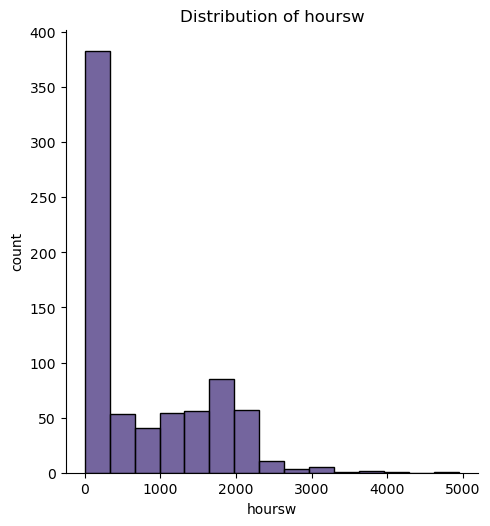

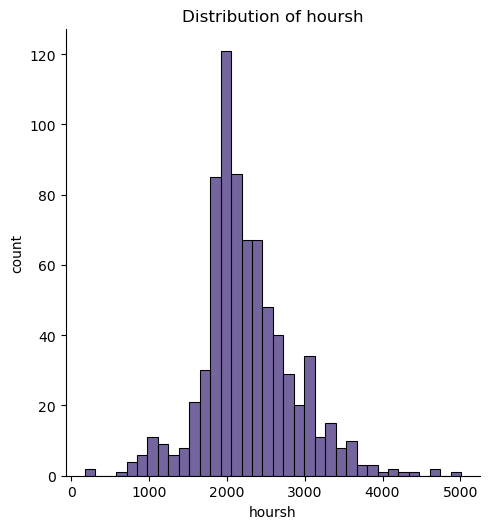

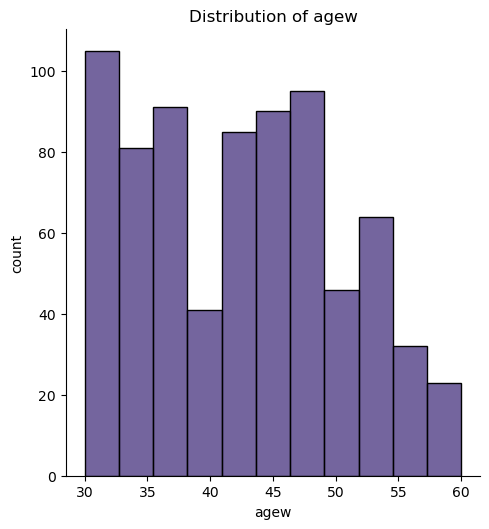

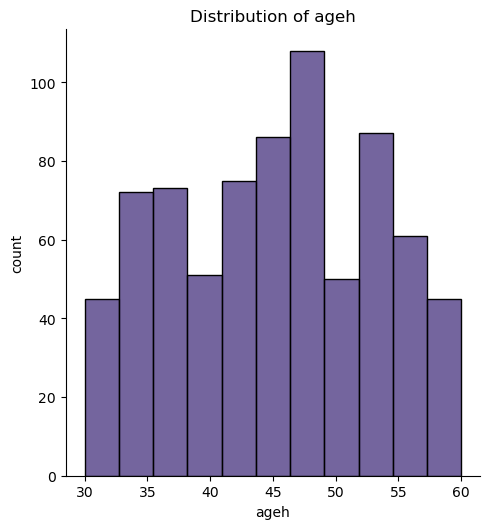

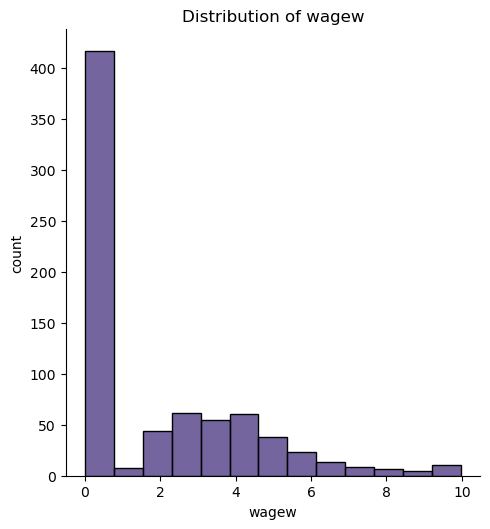

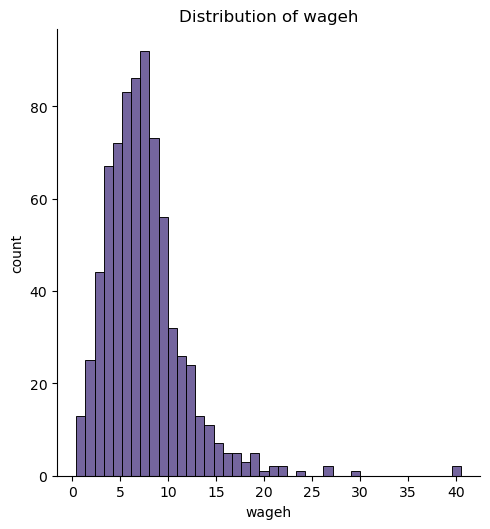

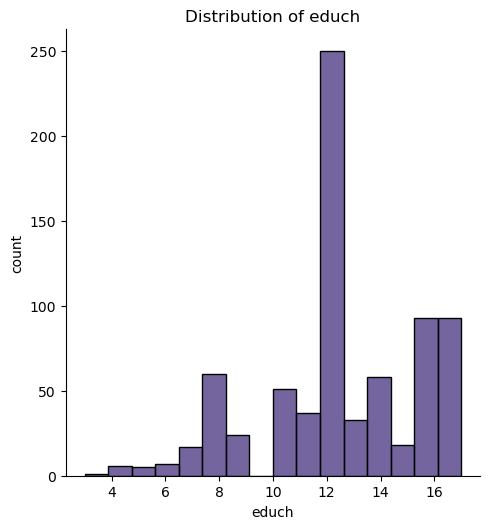

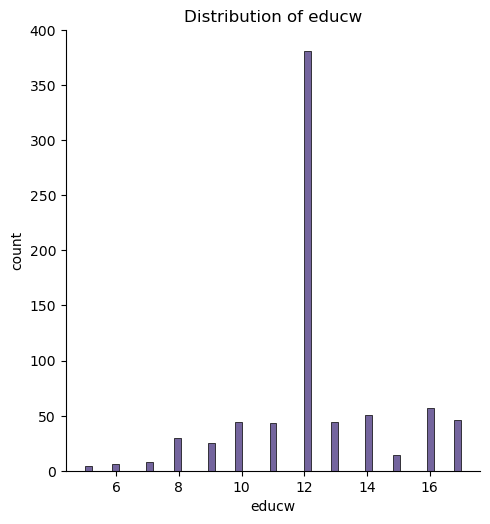

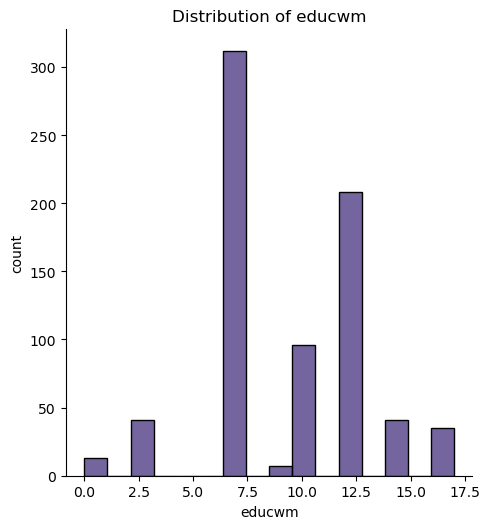

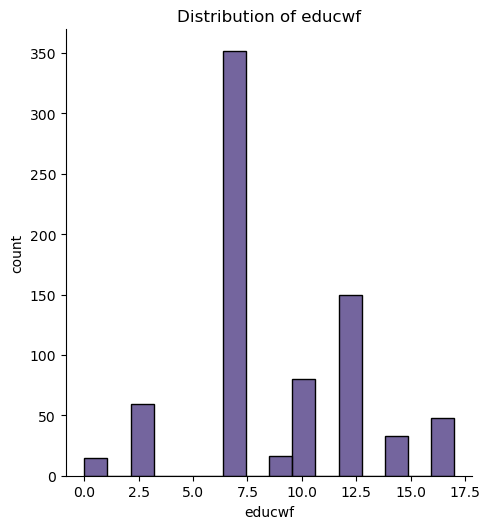

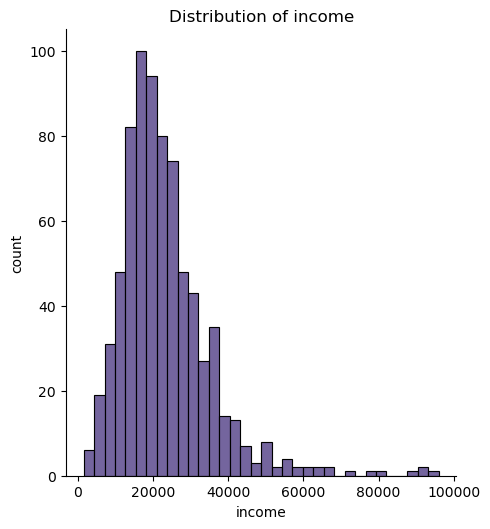

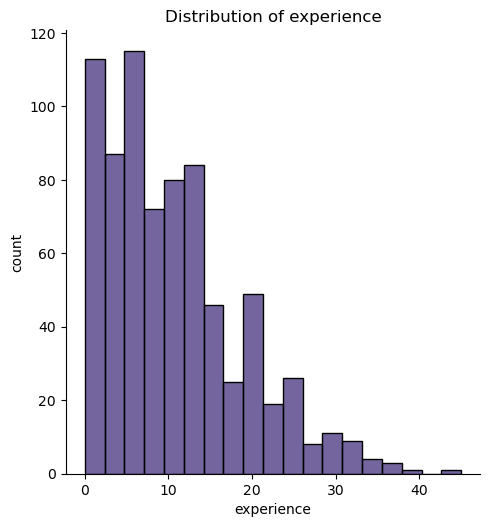

In [4]:
# Remove the 'Unnamed: 0' column becaus its just indexses 
df = df_Mroz.drop(columns=['Unnamed: 0']) 

# List of features we want to visualize
arr_of_possible_features = ['hoursw', 'hoursh', 'agew' ,'ageh', 'wagew', 'wageh',
                            'educh', 'educw', 'educwm', 'educwf' , 'income', 'experience', ]

# Loop through each feature and visualize its distribution
for feat in arr_of_possible_features:
    arr_of_feat = []
    
    # Iterate through the rows of the specified feature column
    for i in range(df[feat].shape[0]):
        arr_of_feat.append(df[feat][i])
    
    # Create a histogram using Seaborn's displot
    sns.displot(arr_of_feat, stat='count')

    # Set plot title, x-label, and y-label
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('count')

    plt.show()

### Checks bivariate relationship between variable:

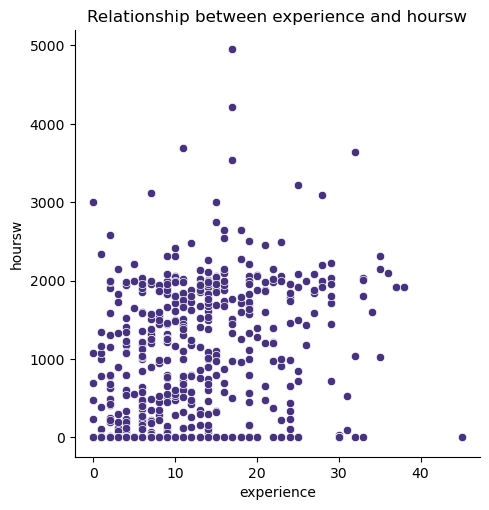

0.4049587169804697
As we can see, there is positive correlation between experience and hoursw.


In [5]:
x='experience'
y='hoursw'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(data=df, x=x, y=y, kind='scatter')

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

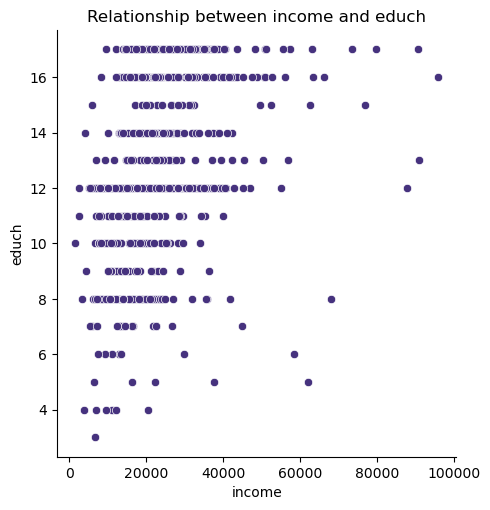

0.3768718448508052
As we can see, there is positive correlation between income and educh.


In [6]:
x='income'
y='educh'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(data=df, x=x, y=y, kind='scatter')

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

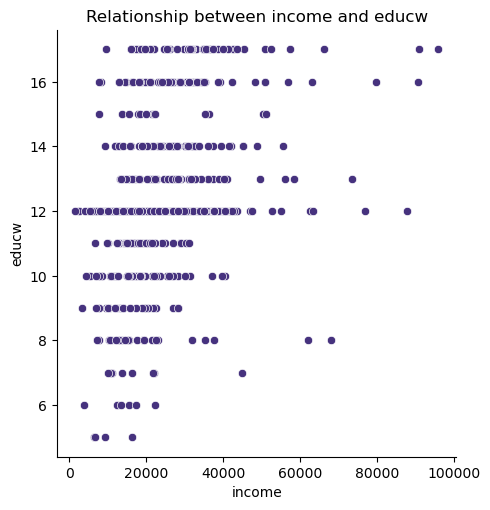

0.3612749505559233
As we can see, there is positive correlation between income and educw.


In [7]:
x='income'
y='educw'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(data=df, x=x, y=y, kind='scatter')

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

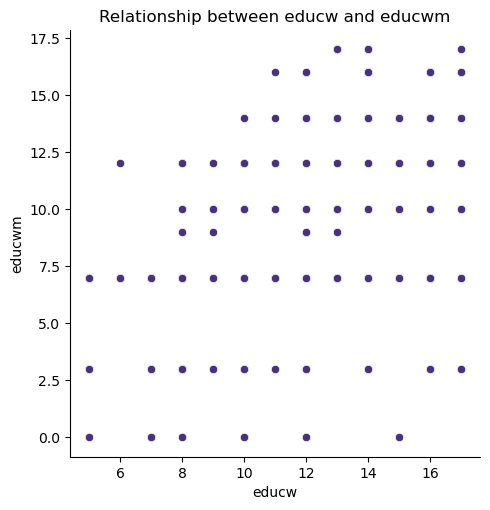

0.43533649718726664
As we can see, there is positive correlation between educw and educwm.


In [8]:
x='educw'
y='educwm'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(data=df, x=x, y=y, kind='scatter')

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

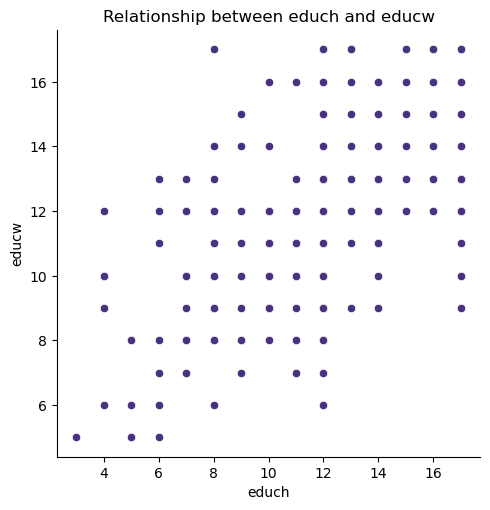

0.6119537777377462
As we can see, there is positive correlation between educh and educw.


In [9]:
x='educh'
y='educw'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(data=df, x=x, y=y, kind='scatter')

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

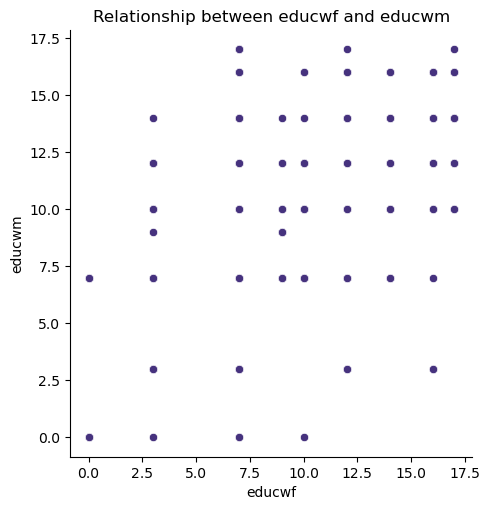

0.5730717425208376
As we can see, there is positive correlation between educwf and educwm.


In [10]:
x='educwf'
y='educwm'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(data=df, x=x, y=y, kind='scatter')

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

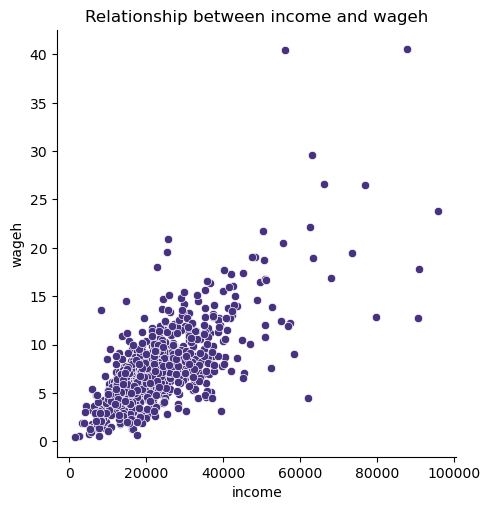

0.7250227470638726
As we can see, there is positive correlation between income and wageh.


In [11]:
x='income'
y='wageh'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(data=df, x=x, y=y, kind='scatter')

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

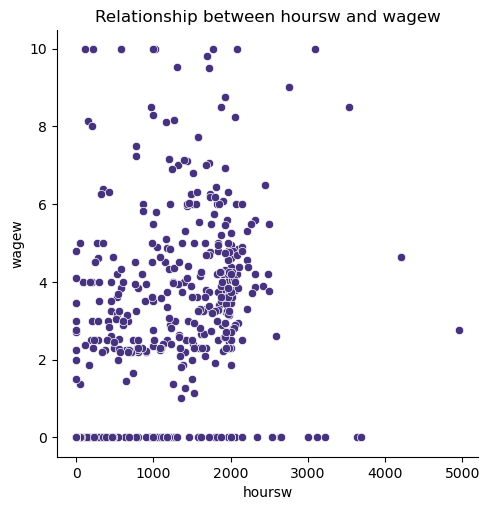

0.6069163749175556
As we can see, there is positive correlation between hoursw and wagew.


In [12]:
x='hoursw'
y='wagew'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(x=x, y=y, data=df)

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is positive correlation between {x} and {y}.")

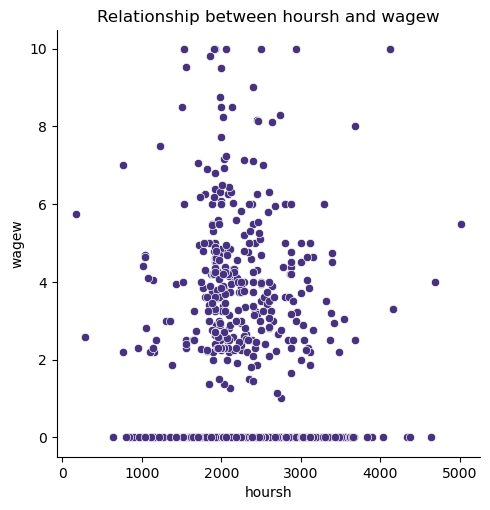

-0.07079719785474861
As we can see, there is no correlation between hoursh and wagew.


In [13]:
x='hoursh'
y='wagew'

# Create the FacetGrid plot
facetgrid_obj = sns.relplot(x=x, y=y, data=df)

# Set the title
facetgrid_obj.set(title=f"Relationship between {x} and {y}")

# Display the plot
plt.show()

#checking the correlation
corr_w = df[x].corr(df[y])
print(corr_w) 

print(f"As we can see, there is no correlation between {x} and {y}.")

##### We will use the distributions and relationships we observd in part 2 in order to answer parts 3,4.

## Part 3: Estimation and hypothesis testing

The question we want to investigate is what is the relationship between the education acquired by the wife and the household income, compared to the relationship between the husband's education and the household income.

Exploring that question, can provide valuable insights into gender dynamics, socioeconomic factors for example:<br>
Gender Equality and Empowerment - Studying the relationship between education, gender, and household income can shed light on the level of gender equality and empowerment within households.<br>
It can help identify whether educational attainment for women is associated with increased economic opportunities and influence within the household.

We've been thinking about why there might be differences in the correlations between education and income, and we've come up with a few reasons.<br>
Firstly, family planning choices and career interruptions, like parental leave, could really impact how our careers and income develop, and it might affect men and women in different ways.<br>
Additionally, we're considering how the availability and cost of childcare and support systems could shape women's ability to go after education and careers, and this might change the link between education and income for women. It's also worth looking at our household dynamics – how responsibilities are divided.<br>
If women tend to take on more unpaid caregiving roles, this could definitely affect how education translates to income.<br>
Moreover, we're thinking about gender-based discrimination in the job market, which might cause income disparities even if people have similar educational backgrounds.<br>
When we put all these aspects together, it becomes clear that the differences in correlations between education and income for different genders are a result of all these factors working together.

We will use the formula to calculate the Pearson correlation:
Pearson's correlation coefficient, when applied to a population, is commonly represented by the Greek letter ρ (rho) and may be referred to as the population correlation coefficient or the population Pearson correlation coefficient. Given a pair of random variables (X,Y), the formula for ρ is:

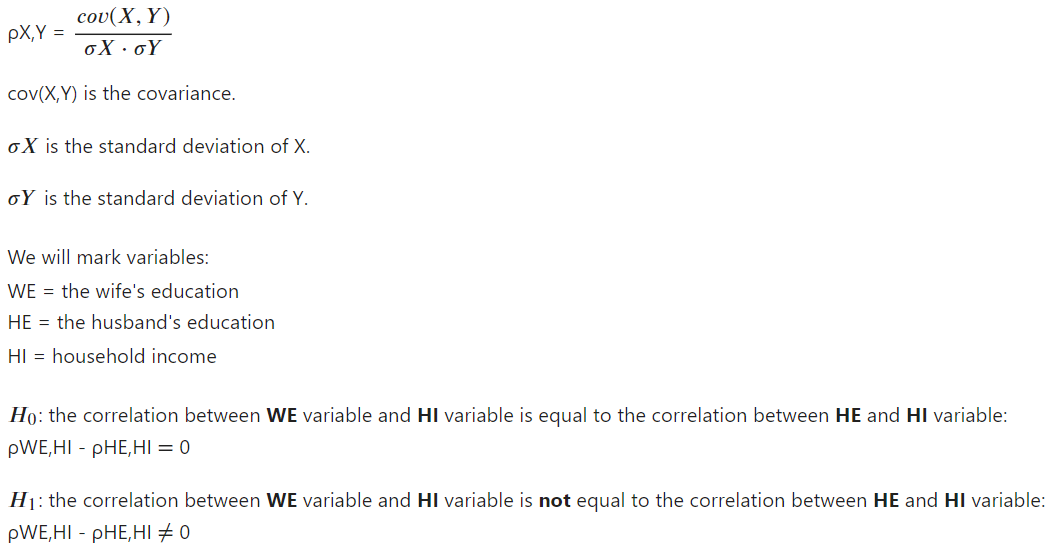

Suppose our dataset represents the household population,
and that the sample that our dataset represents is randomly selected from the population,
And that our sample is rich enough and has an empirical distribution that is similar to the theoretical distribution.
Therefore, the theoretical promise of bootstrap existence is fulfilled, and accordingly,
We will run Bootstrap to test our null hypothesis.

Calculate the test statistic from the given sample:

In [14]:
# function that returns the difference in correlations
def diff_of_corrs(df, column_name_1, column_name_2):
    '''This function returns the difference between the correlation between wife's education and household income,
       and the correlation between husband's education and household income.'''

    corr_w_i = df.income.corr(df[column_name_1])
    corr_h_i = df.income.corr(df[column_name_2])

    return corr_w_i - corr_h_i

#Gets the test statistic and Leave 2 digits after the decimal point
test_statistic = diff_of_corrs(df, 'educw', 'educh')
formatted_number = "{:.2f}".format(test_statistic)

print("Under the assumption that the given data represents the population of household in the United States,"
      "Our test statistic is the the difference between the correlation between wife's education and household income,"
      "and the correlation between husband's education and household income" + f' in the given data: {formatted_number}')

Under the assumption that the given data represents the population of household in the United States,Our test statistic is the the difference between the correlation between wife's education and household income,and the correlation between husband's education and household income in the given data: -0.02


In [15]:
def bootstrap_corr_difference(original_sample, column_name_1, column_name_2, num_replications):
    '''This function returns an array of bootstrapped differences between two sample correlations:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''

    # we need to replicate with the same sample size
    original_sample_size = original_sample.shape[0]

    # collection array for our estimates
    bstrap_corr_diffs = np.empty(num_replications)

    # iterations
    for i in tqdm(range(num_replications)):

        # Gets a random sample at the size of 'original_sample'
        # note WITH REPLACEMENT!
        bootstrap_sample = original_sample.sample(original_sample_size, replace=True)

        # Gets the difference in correlations
        resampled_corr_diff = diff_of_corrs(bootstrap_sample,
                                           column_name_1, column_name_2)

        # Insert to the array
        bstrap_corr_diffs[i] = resampled_corr_diff

    # Returns an array of bootstrapped average differences
    return bstrap_corr_diffs

# run the bootstrap procedure
bstrap_diffs = bootstrap_corr_difference(df, 'educw', 'educh', 5000)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:06<00:00, 828.92it/s]


In [16]:
# Get the endpoints of the 95% confidence interval
left_end_95 = np.percentile(bstrap_diffs, 2.5, method='higher')
right_end_95 = np.percentile(bstrap_diffs, 97.5, method='higher')
formatted_number_left = "{:.2f}".format(left_end_95)
formatted_number_right = "{:.2f}".format(right_end_95)
print("The 95% boostsrap confidence interval for difference between the correlation between wife's" + 
      " education and household income, and the correlation between husband's education and household income: ", 
      [formatted_number_left, formatted_number_right])

The 95% boostsrap confidence interval for difference between the correlation between wife's education and household income, and the correlation between husband's education and household income:  ['-0.08', '0.05']


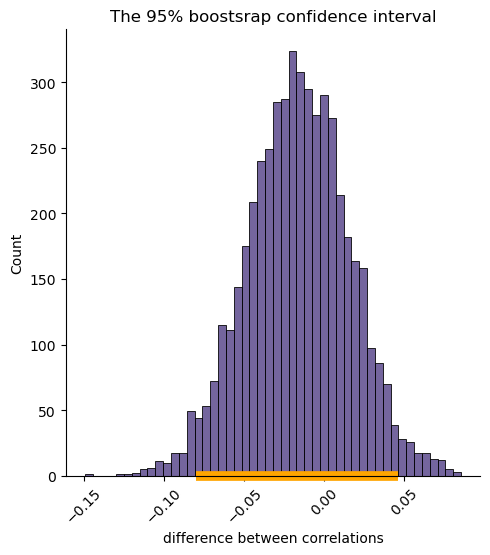

In [17]:
# visualize results
ax = sns.displot(bstrap_diffs)
plt.xticks(rotation=45)
plt.title('The 95% boostsrap confidence interval')
plt.xlabel('difference between correlations')

# draw observed value
#facetgrid_obj.axes[0, 0].scatter(test_statistic, 0, s=150, color='red')

# show line of values between 2.5 and 97.5 percentiles
plt.hlines(y=0, xmin=left_end_95, xmax=right_end_95, colors='orange',
           linestyles='solid', lw=7, clip_on=False);

For confidence intervals of 95%(for a safety level of 95%) we found that the value 0 is in the interval,
and since each value in the distribution represents the difference between the correlation between wife's education and household income, and the correlation between husband's education and household income,
then the difference between the correlations that is equal to 0 is in the interval,
and therefore we can **not** reject the null hypothesis according to which the correlations are equal
(the difference between the correlations is equal to 0).

Based on our analysis of data from the USA in 1975, it's interesting to note that we didn't find any major differences in how education influenced household income between wives and husbands. This could actually make a lot of sense that we did not reject the null hypothesis considering the context of that time.<br> The 1970s was a period when gender roles were shifting, with more women entering the workforce and pursuing higher education. This could have contributed to a more balanced impact of education on income for both partners, regardless of gender. Also, the way responsibilities were shared within households was changing, possibly allowing both partners to contribute more equally to the household income. Moreover, the job landscape was evolving, making educational qualifications more crucial for both men and women to access better-paying opportunities. All of these factors combined could explain why we observed a lack of significant difference in how education affected household income for both husbands and wives. It's like the changing times were leveling the playing field.

## Part 4: Prediction/clustering

#### We have chosen option 1: classification.

The classifier we chose is intended to classify the households that may need assistance from the welfare department.
According to domain knowledge, we defined the families with multiple children who earn less than the average as those who may need assistance.
The reason for choosing our classifier is the state's potential for locating households that may need assistance and thus direct the resources mainly to those who need it most.


### Pre-Processing

#### Convert categorical features to a numeric scale

In [18]:
#We will change the values of yes and no to binary values
for col in df.columns.unique():
    if type(df[col] == 'object'):
        df.replace({col: {'yes': 1, 'no': 0}}, inplace=True)
        df[col] = df[col].astype(int)

df.head()

,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,1,1610,1,0,32,12,3,2,2708,34,12,4,16310,12,7,5,0,14
1,1,1656,0,2,30,12,1,2,2310,30,9,8,21800,7,7,11,1,5
2,1,1980,1,3,35,12,4,4,3072,40,12,3,21040,12,7,5,0,15
3,1,456,0,3,34,12,1,3,1920,53,10,3,7300,7,7,5,0,6
4,1,1568,1,2,31,14,4,3,2000,32,12,10,27300,12,14,9,1,7


#### Creating the target variable - households that may need assistance

In order to find a categorical variable for our definition that would represent the parent homes that need assistance, we will create a new feature from the existing features:<br>
child6<br>
child618<br>
income<br>

In [19]:
def sumChild(row):
    '''Calculate the sum of child counts for age ranges 0-6 and 6-18.
    Parameters: row (pandas Series): A row of the DataFrame containing 'child618' and 'child6' columns.
    Returns: The sum of child counts.'''
    
    return row['child618'] + row['child6']

# Create a new column 'child018' by applying the sumChild function to each row
df['child018'] = df.apply(sumChild, axis='columns')

# Calculate the mean of the 'child018' column
mean_of_child018 = df.child018.mean()

def isLargeFamily(row):
    '''Determine if a family is considered large based on child count.
    Parameters: row (pandas Series): A row of the DataFrame containing 'child018' column.
    Returns: 1 if the family is considered large, 0 otherwise.'''
    
    if row['child018'] > mean_of_child018:
        return 1
    else:
        return 0

# Create a new column 'large_family' by applying the isLargeFamily function to each row
df['large_family'] = df.apply(isLargeFamily, axis='columns')

def lessThanMean(row):
    ''' Determine if income is less than the mean income.
    Parameters: row (pandas Series): A row of the DataFrame containing 'income' column.
    Returns: 1 if income is less than mean, 0 otherwise. '''
    
    if row['income'] < df.income.mean():
        return 1
    else:
        return 0

# Create a new column 'less_than_mean_income' by applying the lessThanMean function to each row
df['less_than_mean_income'] = df.apply(lessThanMean, axis='columns')

def isNeedHelp(row):
    '''Determine if a family needs help based on income and family size.
    Parameters: row (pandas Series): A row of the DataFrame containing 'less_than_mean_income' and 'large_family' columns.
    Returns: 1 if the family needs help, 0 otherwise. '''
    
    if row['less_than_mean_income'] == 1 and row['large_family'] == 1:
        return 1
    else:
        return 0

# Create a new column 'needs_help' by applying the isNeedHelp function to each row
df['needs_help'] = df.apply(isNeedHelp, axis='columns')

# Drop the columns that were used for calculations
df.drop(columns=['child6', 'child618', 'child018', 'income'], inplace=True)

df

,work,hoursw,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,educwm,educwf,unemprate,city,experience,large_family,less_than_mean_income,needs_help
0,1,1610,32,12,3,2,2708,34,12,4,12,7,5,0,14,0,1,0
1,1,1656,30,12,1,2,2310,30,9,8,7,7,11,1,5,1,1,1
2,1,1980,35,12,4,4,3072,40,12,3,12,7,5,0,15,1,1,1
3,1,456,34,12,1,3,1920,53,10,3,7,7,5,0,6,1,1,1
4,1,1568,31,14,4,3,2000,32,12,10,12,14,9,1,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,40,13,0,0,3020,43,16,9,10,10,9,1,5,1,0,0
749,0,0,31,12,0,0,2056,33,12,4,12,12,7,0,14,1,1,1
750,0,0,43,12,0,0,2383,43,12,1,10,3,7,0,4,0,1,0
751,0,0,60,12,0,0,1705,55,8,12,12,12,14,1,15,0,0,0


Note: We noticed when we analyzed the data that there is a difference between the declared income of the father's household and the sum of the salary of the woman and the man 

 We will remove all the observations for which the husband/wife work (according to the number of working hours) without getting paid

In [20]:
# we filttered the dataframe
df_trimmed = df[((df['hoursw'] == 0) & (df['wagew'] == 0)) |
                     ((df['hoursw'] > 0) & (df['wagew'] > 0)) |
                     ((df['hoursw'] == 0) & (df['wagew'] > 0)) | ((df['hoursh'] == 0) & (df['wageh'] == 0)) |
                     ((df['hoursh'] > 0) & (df['wageh'] > 0)) | ((df['hoursh'] == 0) & (df['wageh'] > 0))  ]

### Using the KNN algorithm

#### split to train and test sets

In [21]:
# Shuffle the dataset to make sure that the dataset we used is in random order of observation
shuffled_df = df_trimmed.sample(frac=1).reset_index(drop=True)

# Separate features and labels
X = shuffled_df.loc[:, shuffled_df.columns != 'needs_help']
Y = shuffled_df.loc[:, 'needs_help']   # Labels

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [22]:
# merge the X_train and Y_train
train_df = X_train.copy()
train_df['needs_help'] = Y_train
display(train_df)

# merge the X_test and Y_test
test_df = X_test.copy()
test_df['needs_help'] = Y_test
display(test_df)

,work,hoursw,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,educwm,educwf,unemprate,city,experience,large_family,less_than_mean_income,needs_help
186,0,0,60,12,0,0,1645,58,12,9,7,7,7,1,9,0,1,0
15,1,2076,55,12,4,4,2068,58,10,6,7,7,5,1,20,0,0,0
748,1,561,54,13,2,2,2304,57,16,11,7,7,9,1,19,1,0,0
367,1,2000,32,12,2,2,2895,30,12,4,10,7,7,0,15,1,1,1
172,1,1877,45,12,3,3,1820,50,8,8,10,10,7,0,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,1080,32,10,2,2,1950,35,10,4,10,10,7,0,1,1,1,1
170,1,2000,46,11,4,4,1920,53,8,4,7,7,5,0,19,0,1,0
469,1,2480,39,10,2,4,2880,36,17,8,7,7,3,0,12,1,0,0
205,1,1316,30,17,10,7,2526,41,16,6,16,17,11,1,7,0,0,0


,work,hoursw,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,educwm,educwf,unemprate,city,experience,large_family,less_than_mean_income,needs_help
395,1,2208,48,12,4,5,1892,52,12,5,12,14,5,1,19,0,1,0
335,0,0,32,12,0,0,3260,31,12,4,12,7,7,1,8,1,1,1
16,0,0,53,7,0,0,3481,53,9,1,7,7,7,0,0,0,1,0
221,0,0,58,12,0,0,3478,53,12,4,12,9,11,0,25,0,1,0
303,1,252,32,12,0,0,3644,32,12,4,7,7,3,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,36,8,0,0,2286,40,12,4,0,0,14,0,12,0,1,0
328,0,0,60,12,0,0,1705,55,8,12,12,12,14,1,15,0,0,0
330,1,2147,53,12,4,4,1920,56,8,5,12,12,7,1,35,0,1,0
23,1,490,30,12,4,2,2430,33,11,6,12,12,7,1,7,0,1,0


### Feature selection

#### compute correlation between each pair of variables from the train set

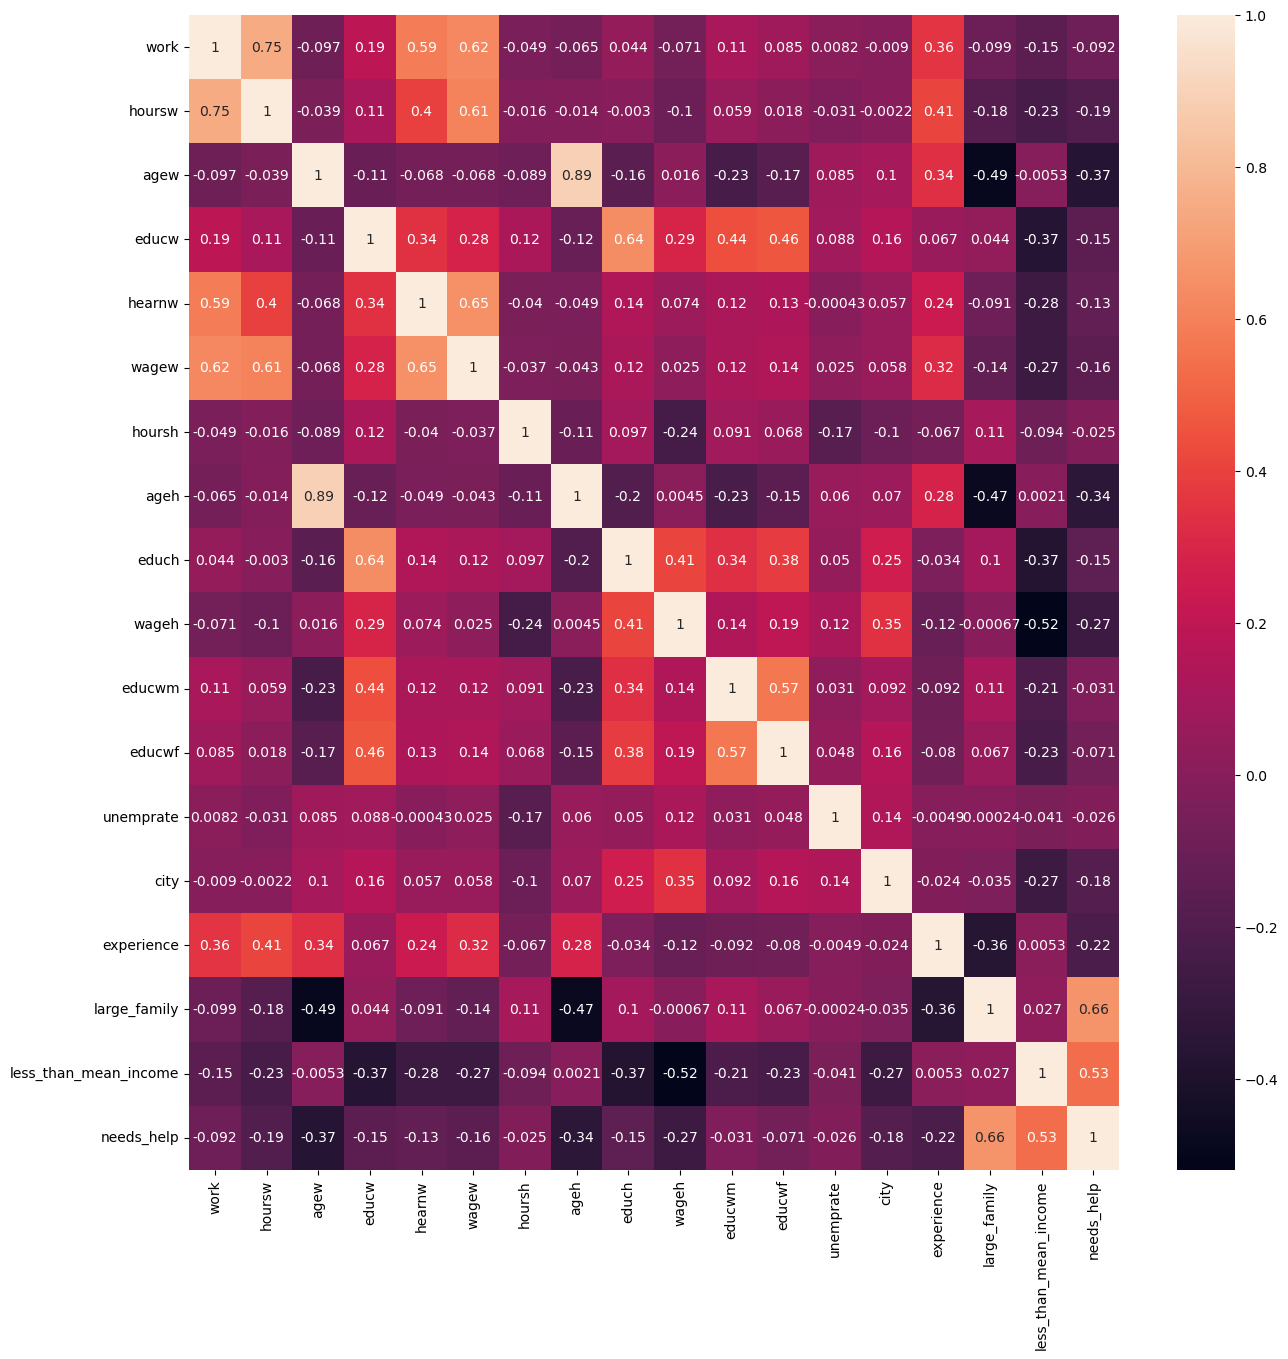

In [23]:
correlations = train_df.corr()

# plot heat map
plt.figure(figsize=(15,15))
g=sns.heatmap(correlations,annot=True)

In [24]:
# Calculating the correlations of variables with the target variable we have chosen
corr_trimmed_sort = correlations.loc[correlations['needs_help'].abs().sort_values(ascending=False).index]

print(corr_trimmed_sort['needs_help'])

needs_help               1.000000
large_family             0.662981
less_than_mean_income    0.534602
agew                    -0.370181
ageh                    -0.340895
wageh                   -0.270340
experience              -0.218840
hoursw                  -0.193597
city                    -0.181603
wagew                   -0.156009
educw                   -0.153681
educh                   -0.146322
hearnw                  -0.134049
work                    -0.091734
educwf                  -0.070547
educwm                  -0.031053
unemprate               -0.026236
hoursh                  -0.025010
Name: needs_help, dtype: float64


In [25]:
# Selection of variables with a high correlation to the target variable and independently of each other
encoded_train_df = train_df[['needs_help','agew','wageh','wagew']]
encoded_test_df = test_df[['needs_help','agew','wageh','wagew']]

X_train = encoded_train_df.loc[:, encoded_train_df.columns != 'needs_help'] # features
Y_train = encoded_train_df.loc[:, 'needs_help'] # Labels
X_test = encoded_test_df.loc[:, encoded_test_df.columns != 'needs_help'] # features
Y_test = encoded_test_df.loc[:, 'needs_help'] # Labels

#### Scaling features

In [26]:
scaler = MinMaxScaler()

# Scale the training data and fit on it and transform
scaled_X_train = scaler.fit_transform(X_train)

# Scale the test data and transform on it
scaled_X_test = scaler.transform(X_test)

#### Selection of the classifier performance index

We opted for the "accuracy" metric to gauge our classifier's performance.<br>
This choice stems from our objective of accurately identifying families in need of government assistance.<br>
Our aim is to minimize missing families that genuinely require help from the welfare department, while also minimizing misclassifying families that don't need such assistance.<br>
This dual approach avoids inconveniences for families and ensures efficient resource allocation.

#### Using cross-validation for evaluation

In [27]:
k_accuracy_scores = np.zeros(21)

for k in range(1, 21):
    # Create a new kNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    accuracy_scorer = make_scorer(accuracy_score)
    # Train model using the cross-validation method using 5 groups (cv=5)
    cv_accuracy_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5, scoring=accuracy_scorer)
    k_accuracy_scores[k] = cv_accuracy_scores.mean()

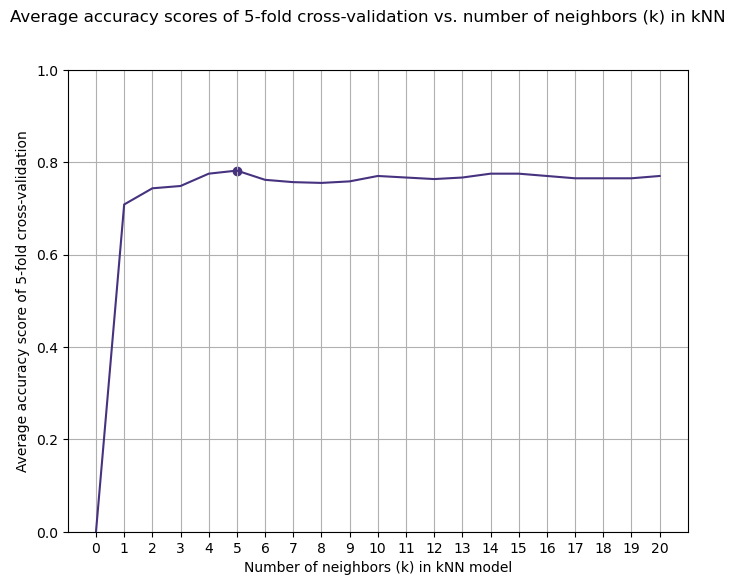

In [28]:
fig, ax = plt.subplots()
ax.plot(range(0, 21), k_accuracy_scores[:])
ax.set_xticks(np.arange(0, 21))
ax.set_ylim(0, 1)
best_k = np.argmax(k_accuracy_scores)
ax.scatter(best_k, np.max(k_accuracy_scores))
fig.set_size_inches(8, 6)
fig.suptitle('Average accuracy scores of 5-fold cross-validation vs. number of neighbors (k) in kNN')
ax.set_xlabel('Number of neighbors (k) in kNN model')
ax.set_ylabel('Average accuracy score of 5-fold cross-validation')
plt.grid()

In [29]:
print(f"Best average accuracy score is: {round(np.max(k_accuracy_scores), 3)}, for number of neighbors (k) = {best_k}")

Best average accuracy score is: 0.782, for number of neighbors (k) = 5


### Computation of classifier recall score on the test set

In [30]:
# fit the model on the entire train set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(scaled_X_train, Y_train)

# test the model on the test set
test_score = knn.score(scaled_X_test, Y_test)
print(f"Test accuracy score is: {round(test_score, 3)}")

Test accuracy score is: 0.762
